In [ ]:
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt
import typing
import pandas as pd


image 1/1 d:\Projects\DETAIR\airport_detection\test_predictions\test_files\test_image_3_moscow__airport.jpg: 1024x1024 4 items, 16.4ms
Speed: 7.3ms preprocess, 16.4ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)
test_image_3_moscow__airport.jpg


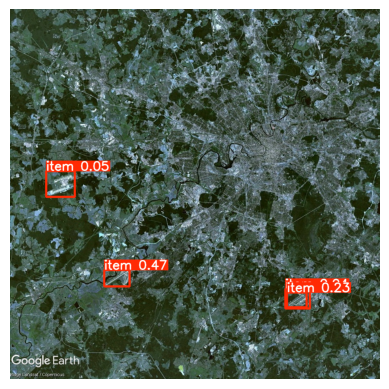


image 1/1 d:\Projects\DETAIR\airport_detection\test_predictions\test_files\test_image_al-ula_airport.jpg: 1024x1024 2 items, 28.0ms
Speed: 9.5ms preprocess, 28.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1024, 1024)
test_image_al-ula_airport.jpg


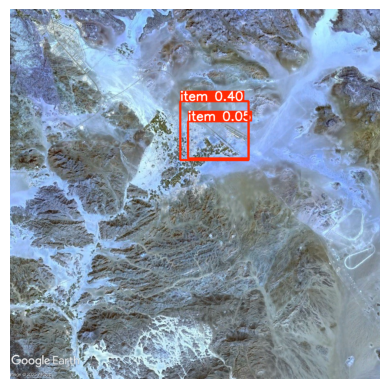


image 1/1 d:\Projects\DETAIR\airport_detection\test_predictions\test_files\test_image_ivalo_airport.jpg: 1024x1024 2 items, 18.6ms
Speed: 8.2ms preprocess, 18.6ms inference, 3.1ms postprocess per image at shape (1, 3, 1024, 1024)
test_image_ivalo_airport.jpg


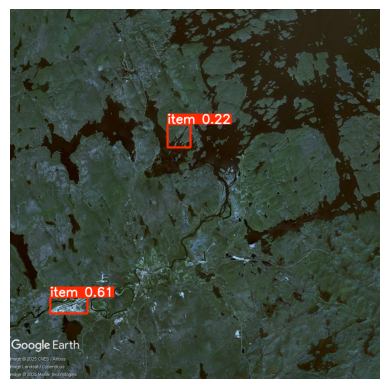


image 1/1 d:\Projects\DETAIR\airport_detection\test_predictions\test_files\test_image_maro-island_airport.jpg: 1024x1024 2 items, 20.7ms
Speed: 7.8ms preprocess, 20.7ms inference, 4.9ms postprocess per image at shape (1, 3, 1024, 1024)
test_image_maro-island_airport.jpg


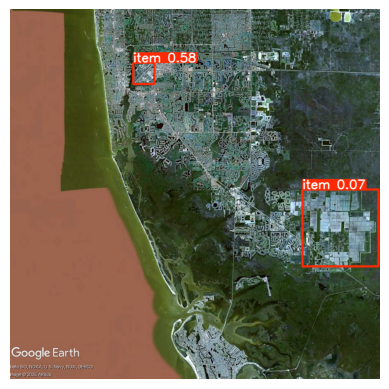


image 1/1 d:\Projects\DETAIR\airport_detection\test_predictions\test_files\test_image_moscow_airport.jpg: 1024x1024 2 items, 27.6ms
Speed: 7.5ms preprocess, 27.6ms inference, 4.5ms postprocess per image at shape (1, 3, 1024, 1024)
test_image_moscow_airport.jpg


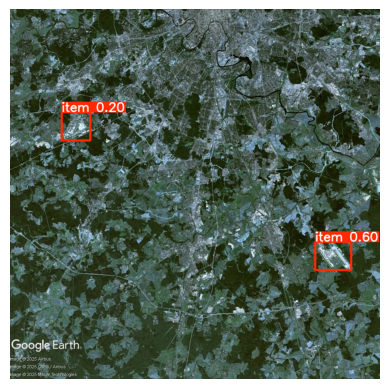


image 1/1 d:\Projects\DETAIR\airport_detection\test_predictions\test_files\test_image_nadym_airport.jpg: 1024x1024 1 item, 20.0ms
Speed: 7.4ms preprocess, 20.0ms inference, 3.3ms postprocess per image at shape (1, 3, 1024, 1024)
test_image_nadym_airport.jpg


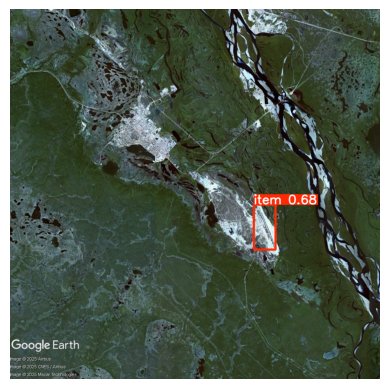


image 1/1 d:\Projects\DETAIR\airport_detection\test_predictions\test_files\test_image_pakistan_airport.jpg: 1024x1024 (no detections), 21.6ms
Speed: 8.0ms preprocess, 21.6ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)
test_image_pakistan_airport.jpg


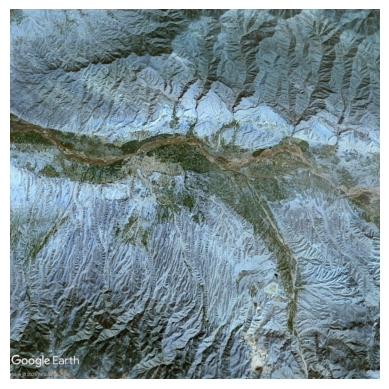


image 1/1 d:\Projects\DETAIR\airport_detection\test_predictions\test_files\test_image_paris_airport.jpg: 1024x1024 7 items, 37.2ms
Speed: 7.4ms preprocess, 37.2ms inference, 1.8ms postprocess per image at shape (1, 3, 1024, 1024)
test_image_paris_airport.jpg


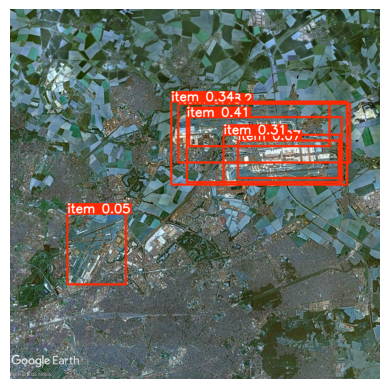


image 1/1 d:\Projects\DETAIR\airport_detection\test_predictions\test_files\test_image_pecin_airport.jpg: 1024x1024 7 items, 16.0ms
Speed: 7.9ms preprocess, 16.0ms inference, 3.6ms postprocess per image at shape (1, 3, 1024, 1024)
test_image_pecin_airport.jpg


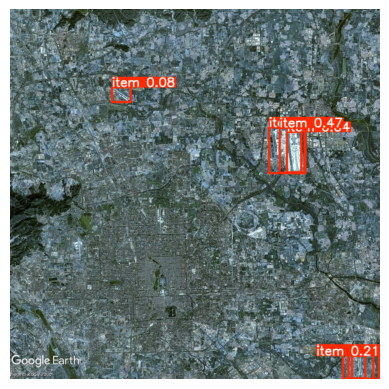

In [ ]:
# Загрузка модели
model_name = 'airport_yolov11'
model = YOLO(f'./models/{model_name}/weights/epoch20.pt')

dir = './test_predictions/test_files'
for photo in os.listdir(dir):
  if photo.endswith(".jpg"):
    results = model.predict(f"{dir}/{photo}", imgsz=(1024, 1024), conf=0.04)

    # Визуализация и сохранение
    print(photo)
    for r in results:
        im_array = r.plot()  # Массив numpy с разметкой
        cv2.imwrite(f"./test_predictions/predictions/{photo.split('.')[0]}_predictions.jpg", im_array)  # Сохранение в файл

        plt.imshow(im_array)
        plt.axis('off')
        plt.show()

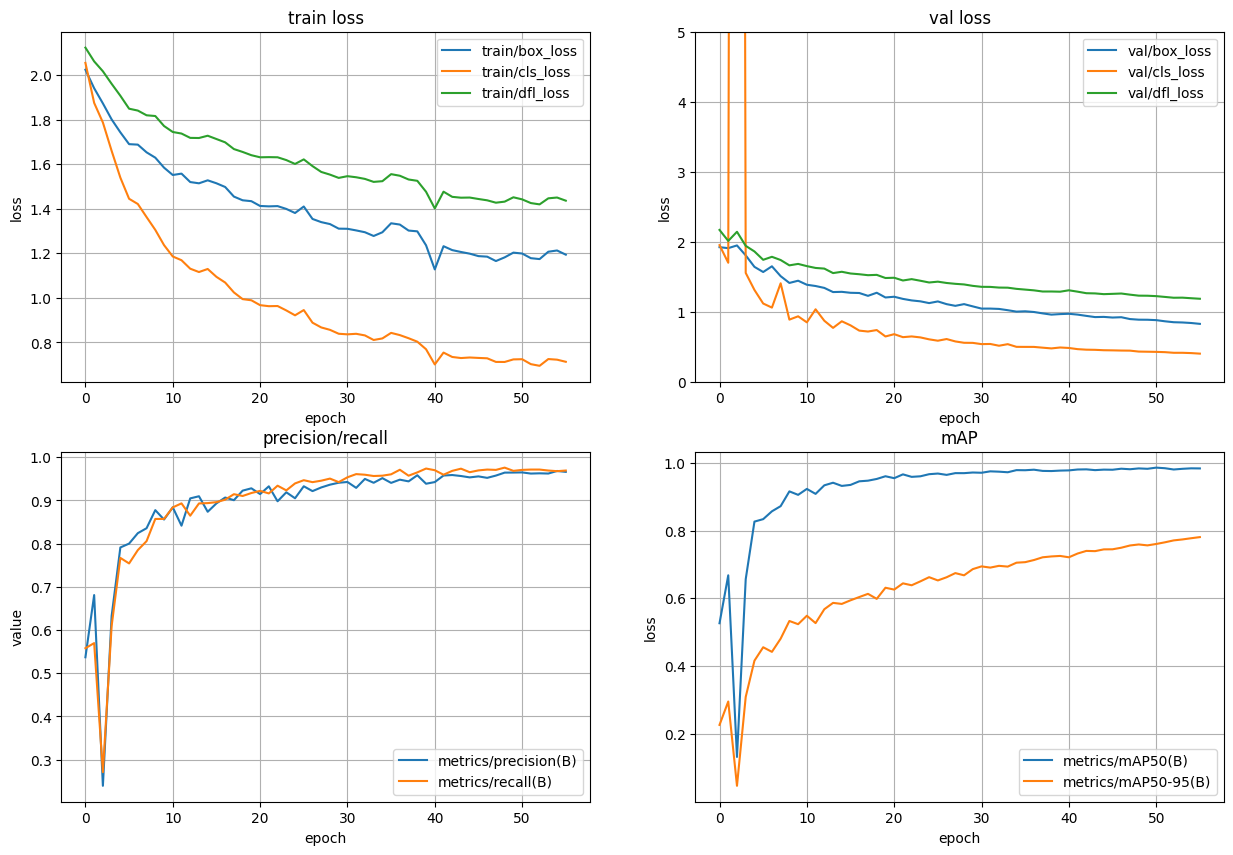

In [14]:
fig: plt.Figure
axes: typing.List[typing.List[plt.Axes]]
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

results = pd.read_csv('./models/airport_yolov11/results.csv')

axes[0][0].plot(results.iloc[:, 2:5])
axes[0][0].legend(results.columns[2:5])
axes[0][0].set_title("train loss")
axes[0][0].set_ylabel("loss")
axes[0][0].set_xlabel("epoch")
axes[0][0].grid()


axes[0][1].plot(results.iloc[:, 9:12])
axes[0][1].legend(results.columns[9:12])
axes[0][1].set_title("val loss")
axes[0][1].set_ylabel("loss")
axes[0][1].set_xlabel("epoch")
axes[0][1].set_ylim((0, 5))
axes[0][1].grid()


axes[1][0].plot(results.iloc[:, 5:7])
axes[1][0].legend(results.columns[5:7])
axes[1][0].set_title("precision/recall")
axes[1][0].set_ylabel("value")
axes[1][0].set_xlabel("epoch")
axes[1][0].grid()


axes[1][1].plot(results.iloc[:, 7:9])
axes[1][1].legend(results.columns[7:9])
axes[1][1].set_title("mAP")
axes[1][1].set_ylabel("loss")
axes[1][1].set_xlabel("epoch")
axes[1][1].grid()

plt.show()
